In [1]:
import pandas as pd
import os 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline

In [2]:
#keras dependencies
from keras.models import Model
from keras.layers import Input,Dense
from keras.layers import LSTM
import tensorflow as tf
import keras
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
from keras.layers import Bidirectional
from keras.layers import TimeDistributed, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


In [3]:
X_s = np.load('Xs_window_100_v2.npy')
y_s = np.load('Ys_window_100_v2.npy')
X_s.shape,y_s.shape

((39680, 100, 35), (39680, 100))

In [6]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_s.flatten()),
                                                 y_s.flatten())
class_weights = dict(zip(np.unique(y_s.flatten()),class_weights))
class_weights

{0.0: 0.5314760246450576, 1.0: 8.442553191489361}

In [7]:
from sklearn.utils import shuffle
X_s,y_s = shuffle(X_s,y_s)

In [10]:
def create_LSTM_model(units=3, rows=100,cols=35):
    # define model
    inputs1 = Input(shape=(rows, cols))
    lstm1, state_h, state_c = LSTM(units, return_sequences=True, return_state=True)(inputs1)
    hidden_state_preds = Dense(1,activation='sigmoid',name='dense_1')(lstm1)
    last_step_preds = Dense(1,activation='sigmoid',name='dense_2')(state_h)
    model = Model(inputs=inputs1, outputs=[hidden_state_preds,last_step_preds])
    return model
model = create_LSTM_model()
output = model.predict(X_s[41,:,:].reshape((1,100,35)))
print(output)

[array([[[0.5281671 ],
        [0.5356245 ],
        [0.53704584],
        [0.53696144],
        [0.54186606],
        [0.54846746],
        [0.54288435],
        [0.616179  ],
        [0.5676032 ],
        [0.5450089 ],
        [0.55567694],
        [0.5446105 ],
        [0.54288816],
        [0.5409866 ],
        [0.5402146 ],
        [0.54005253],
        [0.54783857],
        [0.5514055 ],
        [0.5514098 ],
        [0.5514098 ],
        [0.5514098 ],
        [0.5514098 ],
        [0.5514098 ],
        [0.5514098 ],
        [0.5514098 ],
        [0.5514098 ],
        [0.5514098 ],
        [0.5514098 ],
        [0.5514098 ],
        [0.5514098 ],
        [0.5514098 ],
        [0.5514098 ],
        [0.5514098 ],
        [0.5514098 ],
        [0.5514098 ],
        [0.5514098 ],
        [0.5514098 ],
        [0.5514098 ],
        [0.5514098 ],
        [0.5514098 ],
        [0.5514098 ],
        [0.5514098 ],
        [0.5514098 ],
        [0.5514098 ],
        [0.5514098 ],
        [

In [11]:
# compile the model
model.compile(
    loss=keras.losses.binary_crossentropy,
    optimizer=keras.optimizers.Adam(lr=0.00001),
    metrics=["accuracy"],
)

#callbacks
mcp_save_train_hidden_states = ModelCheckpoint('LSTM_hiddenstates_v2.h5', 
                                               save_best_only=True, 
                                               monitor='val_dense_1_loss', 
                                               mode='min')
mcp_save_train_final_output = ModelCheckpoint('LSTM_finaloutput_v2.h5', 
                                              save_best_only=True, 
                                              monitor='val_dense_2_loss', 
                                              mode='min')

# keep track of the results
history = model.fit(X_s,
                    [y_s.reshape((39680,100,1)),y_s[:,-1]], 
                    batch_size=32,
                    class_weight = class_weights,
                    validation_split = 0.1,
                    callbacks=[mcp_save_train_hidden_states,mcp_save_train_final_output],
                    epochs=60)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 35712 samples, validate on 3968 samples
Epoch 1/60
35712/35712 [==============================] - 264s 7ms/step - loss: 1.4644 - dense_1_loss: 0.7521 - dense_2_loss: 0.7123 - dense_1_acc: 0.4104 - dense_2_acc: 0.6015 - val_loss: 1.4518 - val_dense_1_loss: 0.7484 - val_dense_2_loss: 0.7034 - val_dense_1_acc: 0.4187 - val_dense_2_acc: 0.6154
Epoch 2/60
35712/35712 [==============================] - 246s 7ms/step - loss: 1.4377 - dense_1_loss: 0.7471 - dense_2_loss: 0.6907 - dense_1_acc: 0.4156 - dense_2_acc: 0.6371 - val_loss: 1.4263 - val_dense_1_loss: 0.7453 - val_dense_2_loss: 0.6810 - val_dense_1_acc: 0.4178 - val_dense_2_acc: 0.6545
Epoch 3/60
35712/35712 [==============================] - 261s 7ms/step - loss: 1.4149 - dense_1_loss: 0.7423 - dense_2_loss: 0.6726 - dense_1_acc: 0.4195 - dense_2_acc: 0.6668 - val_loss: 1.4047 - val_dense_1_loss: 0.7394 - val_dense_2_loss: 0.6653

35712/35712 [==============================] - 242s 7ms/step - loss: 0.7387 - dense_1_loss: 0.4405 - dense_2_loss: 0.2981 - dense_1_acc: 0.9410 - dense_2_acc: 0.9386 - val_loss: 0.7398 - val_dense_1_loss: 0.4390 - val_dense_2_loss: 0.3008 - val_dense_1_acc: 0.9390 - val_dense_2_acc: 0.9357
Epoch 52/60
35712/35712 [==============================] - 282s 8ms/step - loss: 0.7301 - dense_1_loss: 0.4348 - dense_2_loss: 0.2953 - dense_1_acc: 0.9410 - dense_2_acc: 0.9387 - val_loss: 0.7312 - val_dense_1_loss: 0.4334 - val_dense_2_loss: 0.2979 - val_dense_1_acc: 0.9390 - val_dense_2_acc: 0.9360
Epoch 53/60
35712/35712 [==============================] - 231s 6ms/step - loss: 0.7218 - dense_1_loss: 0.4292 - dense_2_loss: 0.2926 - dense_1_acc: 0.9410 - dense_2_acc: 0.9387 - val_loss: 0.7233 - val_dense_1_loss: 0.4279 - val_dense_2_loss: 0.2954 - val_dense_1_acc: 0.9390 - val_dense_2_acc: 0.9360
Epoch 54/60
35712/35712 [==============================] - 233s 7ms/step - loss: 0.7136 - dense_1_loss:

In [15]:
metric = pd.DataFrame(history.history)

In [13]:
metrics.to_csv('Log_files_v2.csv')

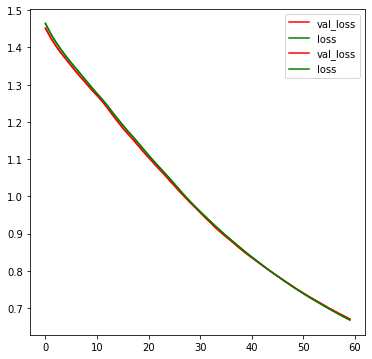

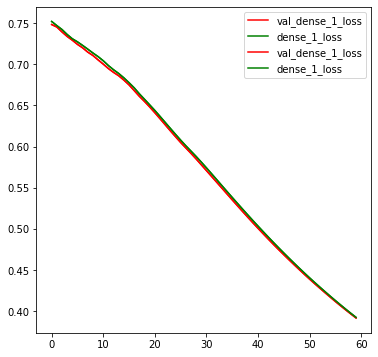

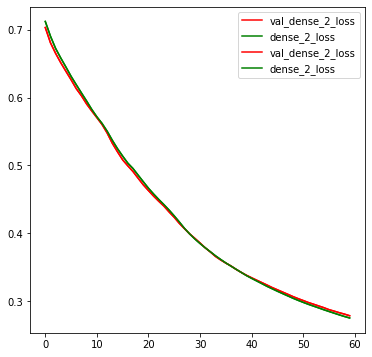

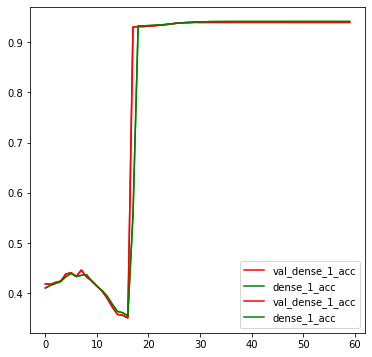

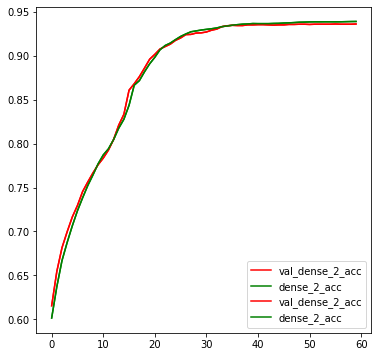

In [16]:
col_pairs = [(metric.columns[i],metric.columns[i+5]) for i in range(0,5)]
for foo in col_pairs:
    plt.figure(figsize=(6,6))
    for i in range(0,len(foo)):
        plt.plot(metric.index,metric[foo[0]],color='red',label=foo[0])
        plt.plot(metric.index,metric[foo[1]],color='green',label=foo[1])
        plt.legend()
    plt.show()
    

In [20]:
output = model.predict(X_s[12,:,:].reshape((1,100,35)))
print(output)

[array([[[0.29684287],
        [0.28561354],
        [0.28391516],
        [0.28368163],
        [0.28364995],
        [0.2836457 ],
        [0.2836451 ],
        [0.28364503],
        [0.28364497],
        [0.28364497],
        [0.28364497],
        [0.28364497],
        [0.28364497],
        [0.28364497],
        [0.28364497],
        [0.28364497],
        [0.28364497],
        [0.28364497],
        [0.28364497],
        [0.28364497],
        [0.28364497],
        [0.28364497],
        [0.28364497],
        [0.28364497],
        [0.28364497],
        [0.28364497],
        [0.28364497],
        [0.28364497],
        [0.28364497],
        [0.28364497],
        [0.28364497],
        [0.28364497],
        [0.28364497],
        [0.28364497],
        [0.28364497],
        [0.28364497],
        [0.28364497],
        [0.28364497],
        [0.28364497],
        [0.28364497],
        [0.28364497],
        [0.28364497],
        [0.28364497],
        [0.28364497],
        [0.28364497],
        [

In [26]:
model.get_weights()

[array([[-0.2884623 ,  0.19166657,  0.03736919,  0.09518781, -0.16537096,
         -0.1129041 ,  0.22339171,  0.10909819,  0.35558614,  0.02080603,
         -0.17777051,  0.30364266],
        [-0.24141496,  0.3390082 , -0.25642002, -0.2967937 ,  0.21418256,
          0.06673491,  0.13649786, -0.04188817, -0.22611396,  0.280689  ,
          0.20478521, -0.15432362],
        [ 0.103331  ,  0.35738   ,  0.1432149 ,  0.3087259 ,  0.04391357,
         -0.12892987, -0.34484106, -0.06478076, -0.15236624,  0.29392472,
         -0.13694745, -0.08382877],
        [ 0.03103671, -0.10106889,  0.14494935, -0.115734  ,  0.17951159,
         -0.04085663, -0.07817706, -0.3293929 ,  0.17941815, -0.33544043,
          0.31479558, -0.24605489],
        [-0.17133953,  0.00924108, -0.29938957, -0.32795957, -0.30419686,
          0.12753312,  0.00604239, -0.1348513 , -0.33743218, -0.3313187 ,
          0.37357968,  0.08618488],
        [ 0.23138112,  0.37465465,  0.09247117, -0.32263   ,  0.22573309,
      

### Load Model Test

In [4]:
from keras.models import load_model
loaded_model = load_model("LSTM_hiddenstates_v2.h5")












Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




In [5]:
loaded_model.predict(X_s[41,:,:].reshape((1,100,35)))

[array([[[0.34125918],
         [0.34125918],
         [0.34125918],
         [0.34125918],
         [0.34125918],
         [0.34125918],
         [0.34125918],
         [0.34125918],
         [0.34125918],
         [0.34125918],
         [0.34125918],
         [0.34125918],
         [0.34125918],
         [0.34125918],
         [0.34125918],
         [0.34125918],
         [0.34125918],
         [0.34125918],
         [0.34125918],
         [0.34125918],
         [0.34125918],
         [0.34125918],
         [0.34125918],
         [0.34125918],
         [0.34125918],
         [0.34125918],
         [0.34125918],
         [0.34125918],
         [0.34125918],
         [0.34125918],
         [0.34125918],
         [0.34125918],
         [0.34125918],
         [0.34125918],
         [0.34125918],
         [0.34125918],
         [0.34125918],
         [0.34125918],
         [0.34125918],
         [0.34125918],
         [0.34125918],
         [0.34125918],
         [0.34125918],
         [0